# 1. Alura Challenge - week 01

## 1.1 Problem Context

<center><img src="alura_cash.png" width="1000" height="1000"></center><br>

The international digital bank **Alura Cash** is facing challenges in its loan sector, where the clients' default is recurrently increasing. This way, it's important to comprehend the main features that affect most the default. The company also requires a prediction model in order to classify the currently client loan and the new ones by the risk of default.


It was provided by the company a dataset containing the historical information of the loans along with personal data of the clients. The dataset is hosted in a Relational Database accesed by MySQL DBMS and summarized as follows:


<table style="width:100%">
<thead>
<tr>
<th style="text-align:justify; font-weight: bold; font-size:14px">Feature Name</th>
<th style="text-align:justify; font-weight: bold; font-size:14px">Description</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:justify"><b>person_age</b></td>
<td style="text-align:justify">Client age</td>
</tr>
<tr>
<td style="text-align:justify"><b>person_income</b></td>
<td style="text-align:justify">Annual income</td>
</tr>
<tr>
<td style="text-align:justify"><b>person_home_ownership</b></td>
<td style="text-align:justify">Type of home ownership</td>
</tr>
<tr>
<td style="text-align:justify"><b>person_emp_length</b></td>
<td style="text-align:justify">Employment length (in years)</td>
</tr>
<tr>
<td style="text-align:justify"><b>loan_intent</b></td>
<td style="text-align:justify">Loan intent</td>
</tr>
<tr>
<td style="text-align:justify"><b>loan_grade</b></td>
<td style="text-align:justify">Loan grade</td>
</tr>
<tr>
<td style="text-align:justify"><b>loan_amnt</b></td>
<td style="text-align:justify">Loan amount</td>
</tr>
<tr>
<td style="text-align:justify"><b>loan_int_rate</b></td>
<td style="text-align:justify">Loan interest rate</td>
</tr>
<tr>
<td style="text-align:justify"><b>loan_status</b></td>
<td style="text-align:justify">Loan status (0 is non default, 1 is default)</td>
</tr>
<tr>
<td style="text-align:justify"><b>loan_percent_income</b></td>
<td style="text-align:justify">Loan percent income</td>
</tr>
<tr>
<td style="text-align:justify"><b>cb_person_default_on_file</b></td>
<td style="text-align:justify">Historical default</td>
</tr>
<tr>
<td style="text-align:justify"><b>cb_person_cred_hist_length</b></td>
<td style="text-align:justify">Credit history length</td>
</tr>
</tbody>
</table>

---

💸**Objectives**
* Explore the Dataset
* Analyse the type of data
* Look for inconsistencies
* Correct the inconsistencies
* Join the tables on their ID
* Export Dataframe to a .csv file

## 1.2. Importing Libraries

In [1]:
import pandas as pd
import mysql.connector

## 1.3. Exploring the content of the Database

In [2]:
# Creating a connection to the MySQL DBMS and a cursor that will allow us to access the data:

db_connection = mysql.connector.connect(host = 'localhost', user = 'root', passwd = '', database = 'analise_risco')
cur = db_connection.cursor()

In [3]:
# Iterating over a list of commands in SQL and generating the respective Dataframes:

sql_commands = {'dados_mutuarios': 'SELECT * FROM dados_mutuarios', 'emprestimos': 'SELECT * FROM emprestimos', 
                'historicos_banco': 'SELECT * FROM historicos_banco', 'ids': 'SELECT * FROM ids'}

df = {}

for name, command in sql_commands.items():
    cur.execute(command)
    table = cur.fetchall()
    column_names = []
    for i in cur.description:
        column_names.append(i[0])
    df[name] = pd.DataFrame(table, columns = column_names)
    
for key, value in df.items():
    print(key)
    display(value.head())
    print(value.shape)
    print('\n')
    print('---------------------------------------------------------------------------------------------------')
    print('\n')

dados_mutuarios


,person_id,person_age,person_income,person_home_ownership,person_emp_length
0,tad8vkTn-vp4l,33.0,48000.0,Rent,17.0
1,dEILQqp2-lgLx,24.0,75000.0,Own,0.0
2,Az11sWWw-SdFA,29.0,28800.0,Rent,5.0
3,YDovEwBH-0eek,23.0,75000.0,Mortgage,7.0
4,lNsbfwlP-gzOE,26.0,35000.0,Rent,0.0


(34489, 5)


---------------------------------------------------------------------------------------------------


emprestimos


,loan_id,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income
0,NMgFWFWN-2yGG,Homeimprovement,C,20000.0,13.22,0.0,0.22
1,08Ts3XSa-KkvE,Venture,C,6000.0,13.49,0.0,0.04
2,xo79pAME-elmp,Personal,A,8000.0,6.17,0.0,0.13
3,IB6lBS2h-nWhz,Homeimprovement,B,9600.0,10.08,0.0,0.16
4,CONLtJHn-1yde,Medical,A,6500.0,8.49,0.0,0.30


(34489, 7)


---------------------------------------------------------------------------------------------------


historicos_banco


,cb_id,cb_person_default_on_file,cb_person_cred_hist_length
0,ZNWGR0Ap-FDt2,N,9.0
1,wqALDH4x-mnzE,N,7.0
2,57O09sJw-NBKj,N,6.0
3,pH50QiTJ-0jqz,Y,10.0
4,3voX5CIK-tCxE,N,12.0


(34489, 3)


---------------------------------------------------------------------------------------------------


ids


,person_id,loan_id,cb_id
0,JAz2tRvQ-14cy,pjEu6snv-4t33,FIgNSkrG-wen7
1,MZSefq9m-loYS,Mfn0Csx4-LGM3,QPDJUQfQ-DJqK
2,cRItaaPB-pRvT,Ks4nz74P-z6Iq,hzAXqSDh-ay7Q
3,5jTDCfXS-zaAq,ZFlwW08i-I3Al,LiAivrS4-J5DE
4,Hbz9PtI3-tOFs,bFMFchcv-UwQW,PkBixMJ3-3bad


(34489, 3)


---------------------------------------------------------------------------------------------------




## 1.4. Analysing the type of data

In [4]:
for key, value in df.items():
    print(key)
    print('\n')
    display(value.info())
    print('\n')
    print('---------------------------------------------------------------------------------------------------')
    print('\n')

dados_mutuarios


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34489 entries, 0 to 34488
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   person_id              34489 non-null  object 
 1   person_age             34168 non-null  float64
 2   person_income          34153 non-null  float64
 3   person_home_ownership  34489 non-null  object 
 4   person_emp_length      33235 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.3+ MB


None



---------------------------------------------------------------------------------------------------


emprestimos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34489 entries, 0 to 34488
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_id              34489 non-null  object 
 1   loan_intent          34489 non-null  object 
 2   loan_grade           34489 non-null  object 
 3   loan_amnt            34158 non-null  float64
 4   loan_int_rate        30862 non-null  float64
 5   loan_status          34146 non-null  float64
 6   loan_percent_income  34173 non-null  float64
dtypes: float64(4), object(3)
memory usage: 1.8+ MB


None



---------------------------------------------------------------------------------------------------


historicos_banco


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34489 entries, 0 to 34488
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cb_id                       34489 non-null  object 
 1   cb_person_default_on_file   34489 non-null  object 
 2   cb_person_cred_hist_length  34488 non-null  float64
dtypes: float64(1), object(2)
memory usage: 808.5+ KB


None



---------------------------------------------------------------------------------------------------


ids


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34489 entries, 0 to 34488
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  34489 non-null  object
 1   loan_id    34489 non-null  object
 2   cb_id      34489 non-null  object
dtypes: object(3)
memory usage: 808.5+ KB


None



---------------------------------------------------------------------------------------------------




All the tables seem to have **consistent type of data**. Nevertheless, we can change later the type for some columns in order to train our prediction model.

## 1.5. Checking for inconsistencies

In [5]:
# Checking for null values on 'dados_mutuarios' table:

sql_command = '''
SELECT SUM(CASE WHEN A.person_id IS NULL OR A.person_id = '' THEN 1 ELSE 0 END) AS null_values_person_id,
       SUM(CASE WHEN A.person_age IS NULL OR A.person_age = '' THEN 1 ELSE 0 END) AS null_values_person_age,
       SUM(CASE WHEN A.person_income IS NULL OR A.person_income = '' THEN 1 ELSE 0 END) AS null_values_person_income,
       SUM(CASE WHEN A.person_home_ownership IS NULL OR A.person_home_ownership = '' THEN 1 ELSE 0 END) AS null_values_person_home_ownership,
       SUM(CASE WHEN A.person_emp_length IS NULL OR A.person_emp_length = '' THEN 1 ELSE 0 END) AS null_values_person_emp_length
FROM dados_mutuarios AS A
'''          
cur.execute(sql_command)
table = cur.fetchall()
column_names = []
for i in cur.description:
    column_names.append(i[0])

df_nulls_mutuarios = pd.DataFrame(table, columns = column_names)
df_nulls_mutuarios

,null_values_person_id,null_values_person_age,null_values_person_income,null_values_person_home_ownership,null_values_person_emp_length
0,4,321,336,331,5571


We have **4 null values** for `person_id` that weren't identified by the Pandas method .info before. Besides, the numbers of null values for `person_emp_length` doesn't match too. Let's take a look at those values to find out more about them:

In [6]:
# Let's see more about the clients with null id:

sql_command = "SELECT * FROM dados_mutuarios WHERE person_id IS NULL OR person_id = '' "

cur.execute(sql_command)
table = cur.fetchall()
column_names = []
for i in cur.description:
    column_names.append(i[0])

df_id_null = pd.DataFrame(table, columns = column_names)
df_id_null

,person_id,person_age,person_income,person_home_ownership,person_emp_length
0,,25.0,125000.0,Mortgage,5.0
1,,32.0,85000.0,Mortgage,3.0
2,,NaN,35100.0,Rent,1.0
3,,28.0,NaN,Rent,3.0


They are in fact **missing values** not identified by the method .info. These 4 data represent only **0.01%** of the final dataframe and it's expected not to be representative in the final result of the model. 

At this point, we could simply exclude them from the database. However, we can fix this when we join the tables by filtering them. Now, let's focus on the other inconsistent column.

In [7]:
# null values on 'person_emp_length' column:

sql_command = "SELECT * FROM dados_mutuarios WHERE person_emp_length IS NULL OR person_emp_length = '' "

cur.execute(sql_command)
table = cur.fetchall()
column_names = []
for i in cur.description:
    column_names.append(i[0])

df_emp_length_null = pd.DataFrame(table, columns = column_names)
df_emp_length_null.head()

,person_id,person_age,person_income,person_home_ownership,person_emp_length
0,dEILQqp2-lgLx,24.0,75000.0,Own,0.0
1,lNsbfwlP-gzOE,26.0,35000.0,Rent,0.0
2,j6Jtq4Kl-crSn,32.0,19200.0,Rent,0.0
3,uwZpWJIF-tWPK,42.0,65000.0,Mortgage,0.0
4,Iu5a6umc-FOTz,27.0,30000.0,Rent,0.0


In this case, the '0' values were identified by SQL as the same as ' ' values. Nevertheless, the '0' values are possible in this context and we'll rely on the .info information for this column.

In [8]:
# checking the range of values on 'dados_mutuarios' table:

sql_command = '''
SELECT MIN(A.person_age) AS min_age, MAX(A.person_age) AS max_age,
MIN(A.person_income) AS min_income, MAX(A.person_income) AS max_income,
MIN(A.person_emp_length) AS min_emp_length, MAX(A.person_emp_length) AS max_emp_length
FROM dados_mutuarios AS A
'''
cur.execute(sql_command)
table = cur.fetchall()
column_names = []
for i in cur.description:
    column_names.append(i[0])

df_range_mutuarios = pd.DataFrame(table, columns = column_names)
df_range_mutuarios

,min_age,max_age,min_income,max_income,min_emp_length,max_emp_length
0,20,144,4000,6000000,0.0,123.0


It's possible to see **inconsistences** on both `person_age` (max_age = 144 years) and `person_emp_length` (max_emp_length = 123 years) columns.

These values will be treated further.

In [9]:
# Checking for null values on 'emprestimos' table:

sql_command = '''
SELECT SUM(CASE WHEN B.loan_id IS NULL OR B.loan_id = '' THEN 1 ELSE 0 END) AS null_values_loan_id,
SUM(CASE WHEN B.loan_intent IS NULL OR B.loan_intent = '' THEN 1 ELSE 0 END) AS null_values_loan_intent,
SUM(CASE WHEN B.loan_grade IS NULL OR B.loan_grade = '' THEN 1 ELSE 0 END) AS null_values_loan_grade,
SUM(CASE WHEN B.loan_amnt IS NULL OR B.loan_amnt = '' THEN 1 ELSE 0 END) AS null_values_loan_amnt,
SUM(CASE WHEN B.loan_int_rate IS NULL OR B.loan_int_rate = '' THEN 1 ELSE 0 END) AS null_values_loan_int_rate,
SUM(CASE WHEN B.loan_status IS NULL OR B.loan_status = '' THEN 1 ELSE 0 END) AS null_values_loan_status,
SUM(CASE WHEN B.loan_percent_income IS NULL OR B.loan_percent_income = '' THEN 1 ELSE 0 END) AS null_values_loan_percent_income
FROM emprestimos AS B
'''          
cur.execute(sql_command)
table = cur.fetchall()
column_names = []
for i in cur.description:
    column_names.append(i[0])

df_nulls_emprestimos = pd.DataFrame(table, columns = column_names)
df_nulls_emprestimos

,null_values_loan_id,null_values_loan_intent,null_values_loan_grade,null_values_loan_amnt,null_values_loan_int_rate,null_values_loan_status,null_values_loan_percent_income
0,0,312,310,331,3627,27039,325


Once more, we have **inconsistencies** (compared to .info method information) on `loan_status` and `loan_percent_income` due to the presence of '0' values.

In [10]:
# checking the range of values on 'emprestimos' table:

sql_command = '''
SELECT MIN(B.loan_amnt) AS min_loan, MAX(B.loan_amnt) AS max_loan,
MIN(B.loan_int_rate) AS min_int_rate, MAX(B.loan_int_rate) AS max_int_rate,
MIN(B.loan_percent_income) AS min_loan_percent, MAX(B.loan_percent_income) AS max_loan_percent
FROM emprestimos AS B
'''
cur.execute(sql_command)
table = cur.fetchall()
column_names = []
for i in cur.description:
    column_names.append(i[0])

df_range_emprestimos = pd.DataFrame(table, columns = column_names)
df_range_emprestimos

,min_loan,max_loan,min_int_rate,max_int_rate,min_loan_percent,max_loan_percent
0,500,35000,5.42,23.22,0.0,0.83


In [11]:
# Checking for null values on 'historico_banco' table:

sql_command = '''
SELECT SUM(CASE WHEN C.cb_id IS NULL OR C.cb_id = '' THEN 1 ELSE 0 END) AS null_values_cb_id,
SUM(CASE WHEN C.cb_person_default_on_file IS NULL OR C.cb_person_default_on_file = '' THEN 1 ELSE 0 END) AS null_values_cb_person_default_on_file,
SUM(CASE WHEN C.cb_person_cred_hist_length IS NULL OR C.cb_person_cred_hist_length = '' THEN 1 ELSE 0 END) AS null_values_cb_person_cred_hist_length
FROM historicos_banco AS C
'''          
cur.execute(sql_command)
table = cur.fetchall()
column_names = []
for i in cur.description:
    column_names.append(i[0])

df_nulls_historico_banco = pd.DataFrame(table, columns = column_names)
df_nulls_historico_banco

,null_values_cb_id,null_values_cb_person_default_on_file,null_values_cb_person_cred_hist_length
0,0,367,1


In [12]:
# checking the range of values on 'historico_banco' table:

sql_command = '''
SELECT MIN(C.cb_person_cred_hist_length) AS min_cred_hist, MAX(C.cb_person_cred_hist_length) AS max_cred_hist
FROM historicos_banco AS C
'''
cur.execute(sql_command)
table = cur.fetchall()
column_names = []
for i in cur.description:
    column_names.append(i[0])

df_range_hitorico_banco = pd.DataFrame(table, columns = column_names)
df_range_hitorico_banco

,min_cred_hist,max_cred_hist
0,2,30


In [13]:
# Checking the debt-to-income ratio (DTI):

sql_command = '''
SELECT dados_mutuarios.person_income, emprestimos.loan_amnt, emprestimos.loan_percent_income,
ROUND(emprestimos.loan_amnt/person_income,2) AS DTI,
ROUND(emprestimos.loan_amnt/person_income / emprestimos.loan_percent_income, 2) AS checking_ratio
FROM dados_mutuarios
    INNER JOIN ids ON dados_mutuarios.person_id = ids.person_id
    INNER JOIN emprestimos ON ids.loan_id  = emprestimos.loan_id
'''
cur.execute(sql_command)
table = cur.fetchall()
column_names = []
for i in cur.description:
    column_names.append(i[0])
df_dti = pd.DataFrame(table, columns = column_names)
df_dti

,person_income,loan_amnt,loan_percent_income,DTI,checking_ratio
0,37500.0,8000.0,0.21,0.21,1.02
1,85000.0,9600.0,0.11,0.11,1.03
2,23712.0,1000.0,0.04,0.04,1.05
3,68000.0,8700.0,0.13,0.13,0.98
4,63000.0,11400.0,0.18,0.18,1.01
...,...,...,...,...,...
34496,80500.0,7200.0,0.09,0.09,0.99
34497,56000.0,10000.0,0.18,0.18,0.99
34498,29000.0,8000.0,0.28,0.28,0.99
34499,44000.0,7500.0,0.14,0.17,1.22


The **`DTI`** column is obtained by dividing the `loan_amnt` by `person_income`. The goal was to compare the result to the `loan_percent_income` column.

Since that they are not the same in some cases, the first assumption was that the `loan_amnt` would represent the maximum possible loan taken by each client while the `loan_percent_income` the actual loan taken at that time. However, when diviving both columns we expected a value over 1 for all the data, which didn't occur.

Another possible scenario is that the `person_income` information was updated after the loan taken. Lastly, we will check the distinct values for the categorical columns. 

In [14]:
sql_commands = {'dados_mutuarios_distinct': 'SELECT DISTINCT(person_home_ownership) FROM dados_mutuarios', 
                'emprestimos_loan_intent_distinct': 'SELECT DISTINCT(loan_intent) FROM emprestimos',
                'emprestimos_loan_grade_distinct': 'SELECT DISTINCT(loan_grade) FROM emprestimos',
                'historicos_banco_distinct': 'SELECT DISTINCT(cb_person_default_on_file) FROM historicos_banco'}

df = {}

for name, command in sql_commands.items():
    cur.execute(command)
    table = cur.fetchall()
    column_names = []
    for i in cur.description:
        column_names.append(i[0])
    df[name] = pd.DataFrame(table, columns = column_names)
    
for key, value in df.items():
    print(key)
    display(value.head())
    print('\n')
    print('---------------------------------------------------------------------------------------------------')
    print('\n')

dados_mutuarios_distinct


,person_home_ownership
0,Rent
1,Own
2,Mortgage
3,
4,Other




---------------------------------------------------------------------------------------------------


emprestimos_loan_intent_distinct


,loan_intent
0,Homeimprovement
1,Venture
2,Personal
3,Medical
4,Education




---------------------------------------------------------------------------------------------------


emprestimos_loan_grade_distinct


,loan_grade
0,C
1,A
2,B
3,D
4,




---------------------------------------------------------------------------------------------------


historicos_banco_distinct


,cb_person_default_on_file
0,N
1,Y
2,




---------------------------------------------------------------------------------------------------




Apart the missing values, there are no **apparent** duplicate data.

## 1.6. Joining Tables using id column

In [15]:
# Let's join the three tables on the id columns, using the 'ids' table as auxiliary and filtering null values on person_id:

sql_command = '''
SELECT A.person_age, A.person_income, A.person_home_ownership, A.person_emp_length,
       D.loan_intent, D.loan_grade, D.loan_amnt, D.loan_int_rate, D.loan_status, D.loan_percent_income,
       C.cb_person_default_on_file, C.cb_person_cred_hist_length
FROM dados_mutuarios AS A
    INNER JOIN ids AS B ON A.person_id = B.person_id
    INNER JOIN historicos_banco AS C ON B.cb_id = C.cb_id
    INNER JOIN emprestimos as D ON B.loan_id = D.loan_id
WHERE A.person_id != ''
'''
cur.execute(sql_command)
table = cur.fetchall()
column_names = []
for i in cur.description:
    column_names.append(i[0])

df_final = pd.DataFrame(table, columns = column_names)
df_final

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,50000.0,Mortgage,0.0,Debtconsolidation,A,12800.0,5.79,0.0,0.26,N,2
1,26.0,84996.0,Rent,0.0,Medical,B,9000.0,11.26,0.0,0.11,N,2
2,24.0,55782.0,Rent,3.0,Homeimprovement,A,17000.0,7.51,0.0,0.30,N,2
3,25.0,125000.0,Own,9.0,Personal,B,25000.0,10.59,0.0,0.20,N,2
4,23.0,44340.0,Own,0.0,Venture,C,3000.0,12.98,0.0,0.07,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
34480,39.0,33996.0,Rent,6.0,Medical,D,4000.0,NaN,1.0,0.12,N,13
34481,24.0,36000.0,Mortgage,NaN,Homeimprovement,A,14775.0,6.62,0.0,0.41,N,4
34482,27.0,39600.0,Mortgage,11.0,Debtconsolidation,A,4800.0,6.76,0.0,0.12,N,9
34483,30.0,39996.0,Mortgage,8.0,Medical,C,10000.0,12.73,0.0,0.25,N,6


## 1.7. Exporting final dataframe to .csv file

In [16]:
# Exporting .csv file to the secure-file-priv directory:

sql_command = '''
SELECT 'person_age', 'person_income', 'person_home_ownership', 'person_emp_length',
       'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'
UNION ALL
SELECT A.person_age, A.person_income, A.person_home_ownership, A.person_emp_length,
       D.loan_intent, D.loan_grade, D.loan_amnt, D.loan_int_rate, D.loan_status, D.loan_percent_income,
       C.cb_person_default_on_file, C.cb_person_cred_hist_length
FROM dados_mutuarios AS A
    INNER JOIN ids AS B ON A.person_id = B.person_id
    INNER JOIN historicos_banco AS C ON B.cb_id = C.cb_id
    INNER JOIN emprestimos as D ON B.loan_id = D.loan_id
WHERE A.person_id != ''
INTO OUTFILE '/ProgramData/MySQL/MySQL Server 8.0/Uploads/loan_dataset.csv'
FIELDS TERMINATED BY ','
LINES TERMINATED BY '\n'
'''
cur.execute(sql_command)
table = cur.fetchall()

cur.close()
db_connection.close()

# 2. Alura Challenge - week 02

🏦**Objectives**
* Remove missing values
* Identify and treat outliers
* Explore the data
* Transform categorical features
* Calculate feature correlation
* Normalize and balance data
* Create predictive models
* Evaluate the models
* Optimize models
* Export best model

## 2.1 Importing Libraries

In [1]:
import pandas as pd
pd.set_option("display.max_columns", 100)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_score, train_test_split
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score, make_scorer, auc, roc_auc_score, precision_recall_curve, auc
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import joblib

## 2.2 Removing missing values

In [2]:
# First let's import our dataframe again:

df_final = pd.read_csv('loan_dataset.csv')
df_final.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,50000.0,Mortgage,0.0,Debtconsolidation,A,12800.0,5.79,0.0,0.26,N,2
1,26.0,84996.0,Rent,0.0,Medical,B,9000.0,11.26,0.0,0.11,N,2
2,24.0,55782.0,Rent,3.0,Homeimprovement,A,17000.0,7.51,0.0,0.30,N,2
3,25.0,125000.0,Own,9.0,Personal,B,25000.0,10.59,0.0,0.20,N,2
4,23.0,44340.0,Own,0.0,Venture,C,3000.0,12.98,0.0,0.07,Y,3


In [3]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34485 entries, 0 to 34484
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  34165 non-null  float64
 1   person_income               34150 non-null  float64
 2   person_home_ownership       34154 non-null  object 
 3   person_emp_length           33231 non-null  float64
 4   loan_intent                 34174 non-null  object 
 5   loan_grade                  34176 non-null  object 
 6   loan_amnt                   34154 non-null  float64
 7   loan_int_rate               30859 non-null  float64
 8   loan_status                 34142 non-null  float64
 9   loan_percent_income         34170 non-null  float64
 10  cb_person_default_on_file   34119 non-null  object 
 11  cb_person_cred_hist_length  34485 non-null  int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 3.2+ MB


In [4]:
# We can now remove both missing and eventually duplicate values:

df_final.dropna(inplace = True)
df_final.drop_duplicates(inplace = True )

In [5]:
df_final.shape

(28501, 12)

We have lost a good amount of data but we followed the company's **orientation** in this case.

## 2.3 Identifying and treating Outliers

In [6]:
# The .describe() method provides us a first help to find outliers in our dataset:

df_final.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28501.000000,2.850100e+04,28501.000000,28501.000000,28501.000000,28501.000000,28501.000000,28501.000000
mean,27.738676,6.665441e+04,4.790148,9658.533034,11.045385,0.217115,0.169517,5.800498
std,6.316166,6.237603e+04,4.157462,6329.604672,3.230748,0.412289,0.106410,4.042153
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.950000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
# Let's create a function to plot a histogram and a boxplot for numerical data:

def plot_outliers(column, label_x, title1, title2):

    plt.figure(figsize = (20,8))

    sns.set(style = 'darkgrid')

    ax0 = plt.subplot(121)
    ax0 = sns.histplot(x = column, color = 'royalblue', kde = False, bins = 20)
    ax0.set_title(title1, fontsize = 15, color = 'black')
    ax0.set_ylabel('Count', color = 'black', fontsize = 13)
    ax0.set_xlabel(label_x, color = 'black', fontsize = 13, labelpad = 15)

    ax1 = plt.subplot(122)
    ax1 = sns.boxplot(data = column, orient = 'h', color = 'royalblue')
    ax1.set_title(title2, fontsize = 15, color = 'black')
    ax1.set_xlabel(label_x, color = 'black', fontsize = 13, labelpad = 15)

    plt.show()

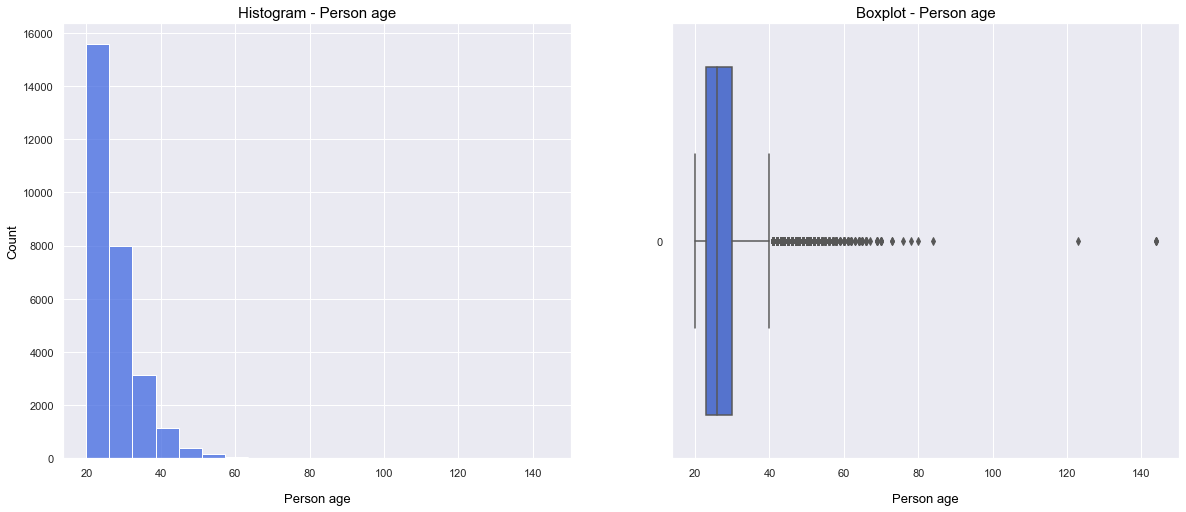



-------------------------------------------------------------------------------------------------------------------




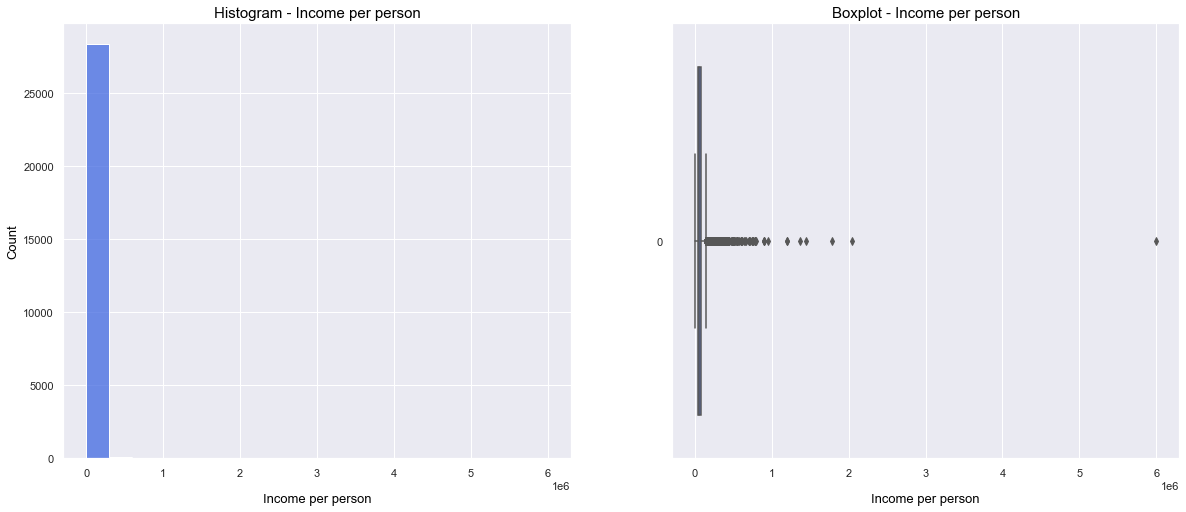



-------------------------------------------------------------------------------------------------------------------




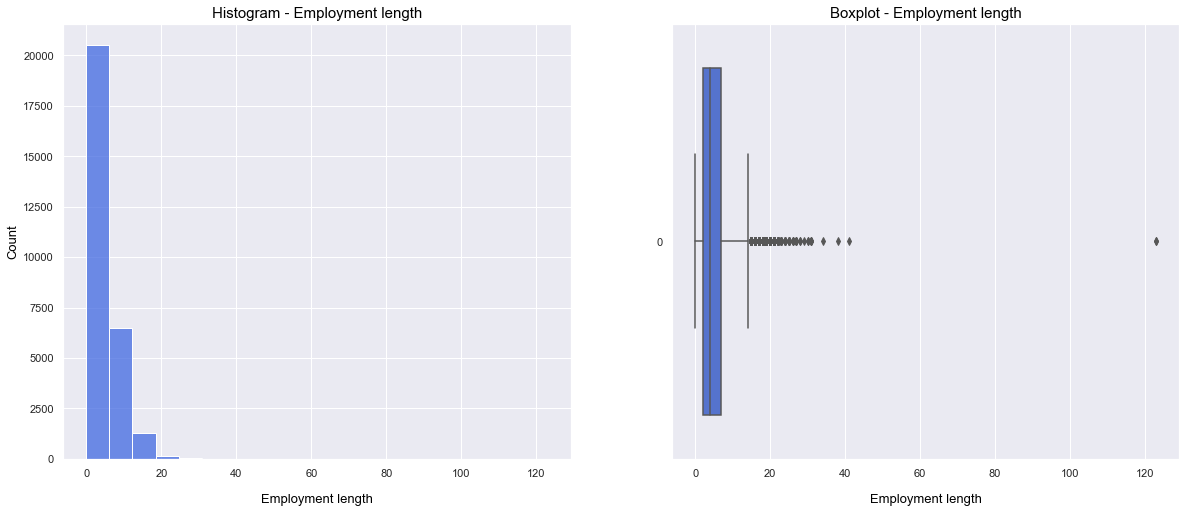



-------------------------------------------------------------------------------------------------------------------




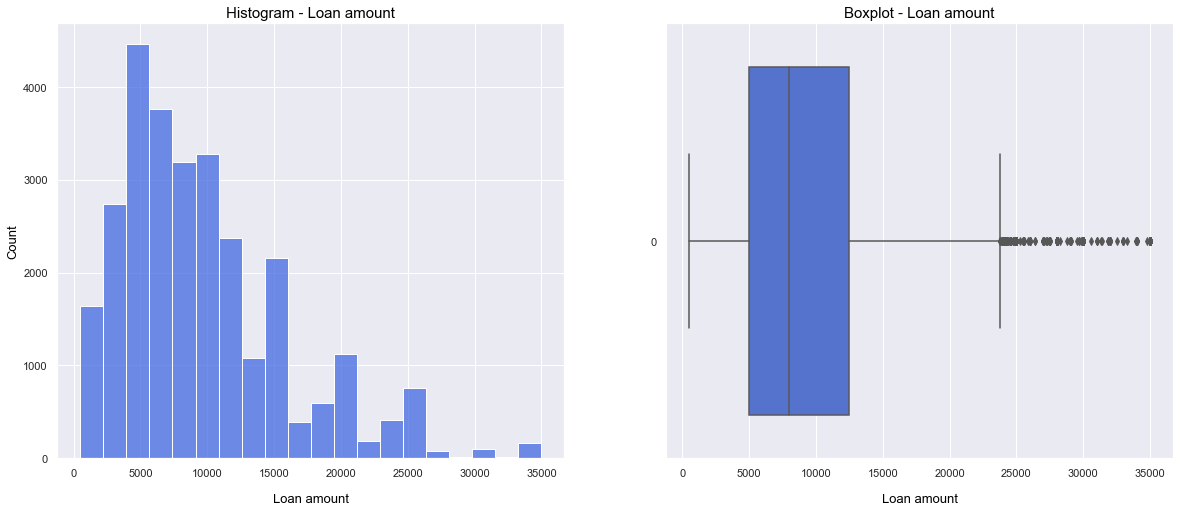



-------------------------------------------------------------------------------------------------------------------




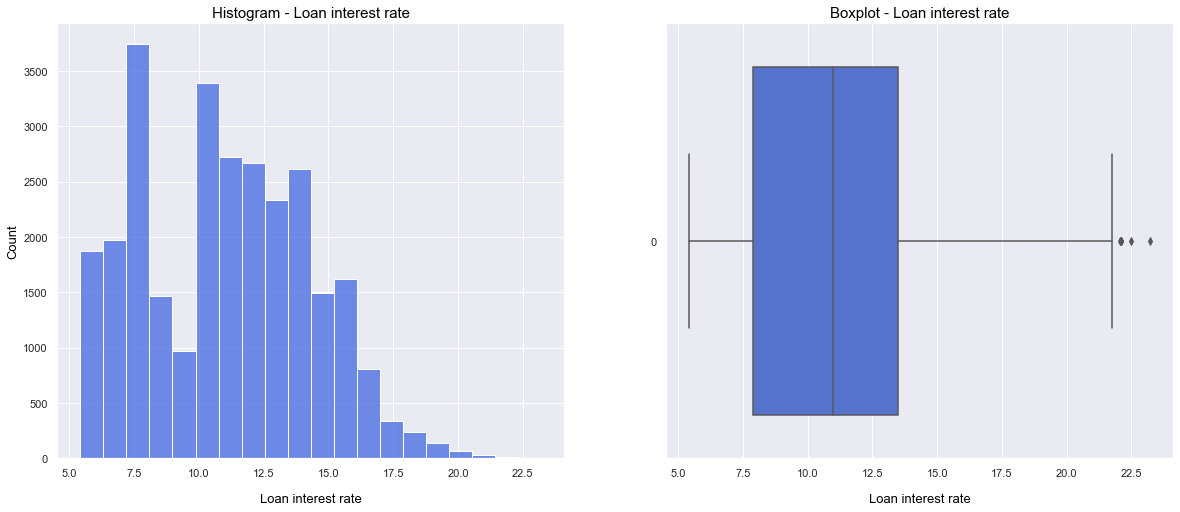



-------------------------------------------------------------------------------------------------------------------




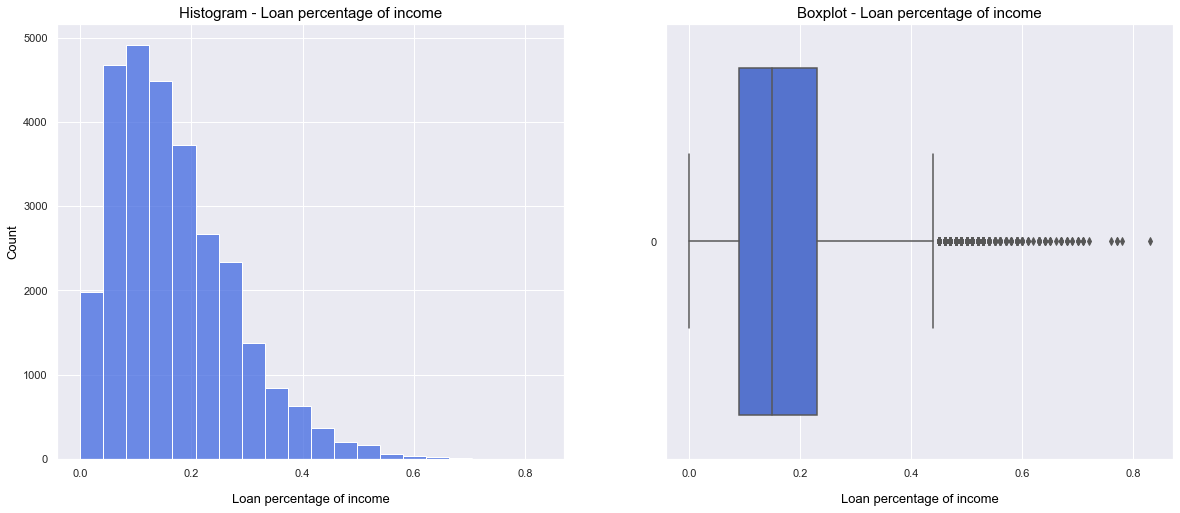



-------------------------------------------------------------------------------------------------------------------




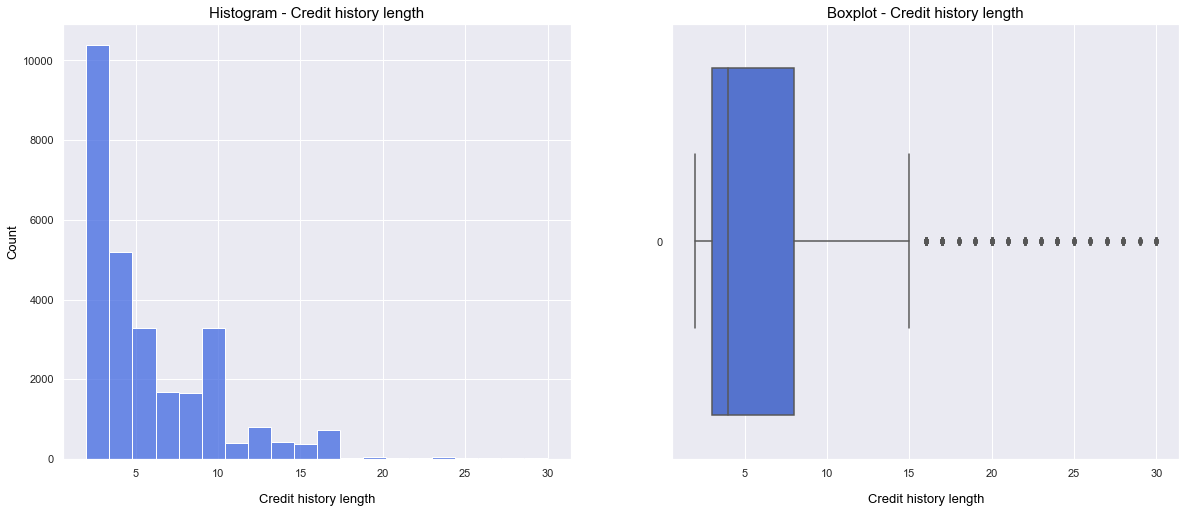



-------------------------------------------------------------------------------------------------------------------




In [8]:
# We can now iterate over numeric columns:

columns = {'Person age': df_final['person_age'], 'Income per person': df_final['person_income'], 
           'Employment length': df_final['person_emp_length'], 'Loan amount': df_final['loan_amnt'], 
           'Loan interest rate': df_final['loan_int_rate'], 'Loan percentage of income': df_final['loan_percent_income'], 
           'Credit history length': df_final['cb_person_cred_hist_length']}

for name, column in columns.items():

    plot_outliers(column, name, 'Histogram - ' + name, 'Boxplot - ' + name)
    print('\n')
    print('-------------------------------------------------------------------------------------------------------------------')
    print('\n')

We can visually identify some **outliers** in the plots. They are basically located on the right of boxplots and also cause a distortion in the respective histograms. 

Let's start by checking the `Person Age` and `Employment Length` columns:

In [9]:
# Filtering Age over 100 years:

df_final[df_final['person_age'] > 100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
182,144.0,200000.0,Mortgage,4.0,Education,B,6000.0,11.86,0.0,0.03,N,2
13821,144.0,6000000.0,Mortgage,12.0,Personal,C,5000.0,12.73,0.0,0.00,N,25
17225,123.0,80004.0,Rent,2.0,Education,B,20400.0,10.25,0.0,0.25,N,3
29227,144.0,250000.0,Rent,4.0,Venture,C,4800.0,13.57,0.0,0.02,N,3


In [10]:
# Filtering Employment length over 50 years:

df_final[df_final['person_emp_length'] > 50]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
8163,22.0,59000.0,Rent,123.0,Personal,D,35000.0,16.02,1.0,0.59,Y,3
21137,21.0,192000.0,Mortgage,123.0,Venture,A,20000.0,6.54,0.0,0.10,N,4


In [11]:
# Let's also check if the 'person_emp_length' is not bigger than 'person_age':

df_final[df_final['person_emp_length'] > df_final['person_age']]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
8163,22.0,59000.0,Rent,123.0,Personal,D,35000.0,16.02,1.0,0.59,Y,3
21137,21.0,192000.0,Mortgage,123.0,Venture,A,20000.0,6.54,0.0,0.10,N,4


The same outliers already shown before.

Those are the **most evident outliers** identified by the plots. Although the other columns seem to have discrepant values, we can not affirm with certainty they represent outliers as they may be possible to be observed in this context.

In [12]:
# Filtering outliers:

df_final = df_final[(df_final['person_emp_length'] < 50) & (df_final['person_age'] < 100)]
df_final.shape

(28495, 12)

## 2.4 Exploratory Analysis

* What is the proportion of values in the categorical data?

In [13]:
# Let's create a function to visualize the categorical data:

def barplot(column, title, diff):
    
    proportion = round(column.value_counts(normalize = True)*100, 2)
    labels = [i for i in proportion.keys()]
    
    plt.figure(figsize = (10, 6))
    plt.title(title, fontsize = 15, color = 'black')
    plt.bar(labels, proportion, width = 0.6, color = "royalblue")
    plt.grid(False)
    
    for i, v in enumerate(proportion):
        plt.text(i - diff, v + 0.5, str(v) + '%')
        
    plt.yticks([])
    plt.show()

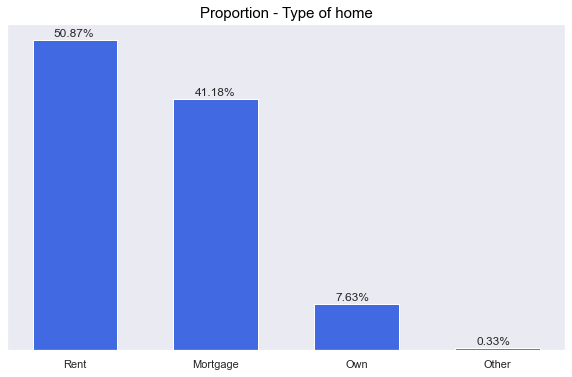



-----------------------------------------------------------------------------------------------------------




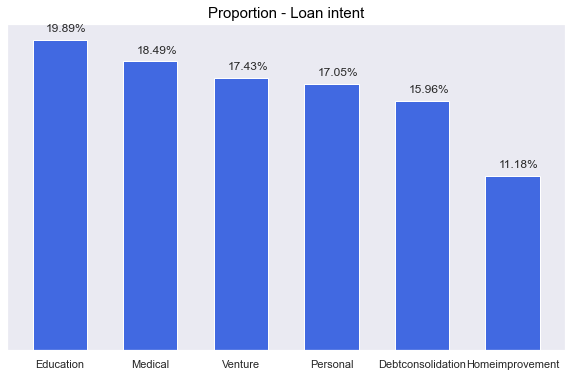



-----------------------------------------------------------------------------------------------------------




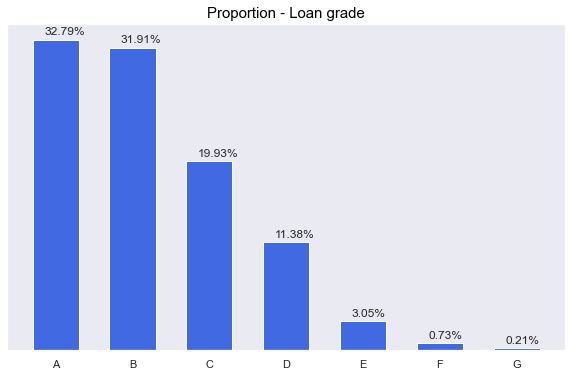



-----------------------------------------------------------------------------------------------------------




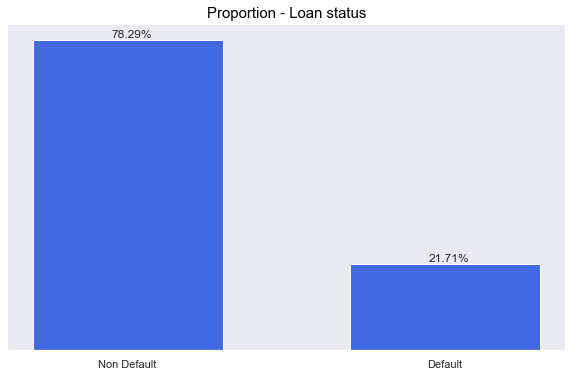



-----------------------------------------------------------------------------------------------------------




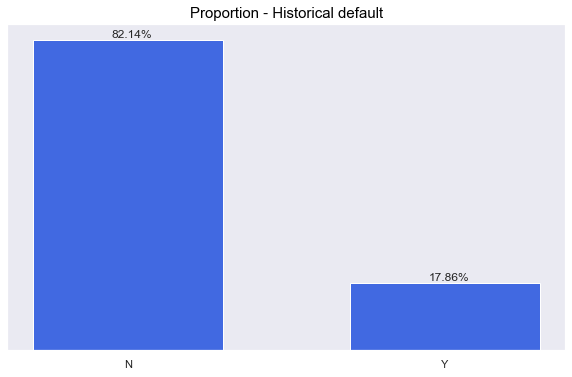



-----------------------------------------------------------------------------------------------------------




In [14]:
df_final['loan_status'] = df_final['loan_status'].map({0: 'Non Default', 1: 'Default'})

columns = {'Type of home': df_final['person_home_ownership'], 'Loan intent': df_final['loan_intent'], 
           'Loan grade': df_final['loan_grade'], 'Loan status': df_final['loan_status'], 
           'Historical default': df_final['cb_person_default_on_file']}

for name, column in columns.items():
    
    if name == 'Loan status' or name == 'Historical default':
    
        barplot(column, 'Proportion - ' + name, 0.05)
        print('\n')
        print('-----------------------------------------------------------------------------------------------------------')
        print('\n')
    
    else:
        
        barplot(column, 'Proportion - ' + name, 0.15)
        print('\n')
        print('-----------------------------------------------------------------------------------------------------------')
        print('\n')
    
df_final['loan_status'] = df_final['loan_status'].map({'Non Default': 0, 'Default': 1})

Some interesting conclusions from the plots: 

* Most of the clients live currently in either **rent or mortgage homes**; 
* The reasons why a client borrow money from Alura Cash are diversified, being **education** as the main purpose; 
* A great part of the loan granted can be classified as being of **good grade** (A or B); 
* The proportion between the status of clients' default is **imbalanced** and will need to be treated further; 
* Most of the clients **don't have a history of default**.

* How are the classes distributed in terms of default status?

In [15]:
def class_distribution(numerical, categorical, title1, title2):
    
    plt.figure(figsize = (12,8))

    sns.set(style = 'darkgrid')
    
    # Boxplot between the feature and 'loan_status':
    
    ax0 = plt.subplot(121)
    ax0 = sns.boxplot(data = df_final, x = 'loan_status', y = numerical, orient = 'v', width = 0.5, 
                 color = 'royalblue')
    ax0.set_title(title1, fontsize = 15, color = 'black', y = 1.02)
    
    plt.ylim([0, df_final[numerical].median() * 4]) #Let's set a limit for visual purpose
    
    
    # Creating an auxiliary filter for 'loan_status'
    
    df_filter = df_final[[categorical, 'loan_status']]

    df_filter_default = df_filter[df_filter['loan_status'] == 'Default']
    df_filter_default = df_filter_default.rename(columns = {'loan_status': 'Default'})
    df_filter_default = df_filter_default.groupby(categorical).agg(func = 'count')


    df_filter_nondefault = df_filter[df_filter['loan_status'] == 'Non Default']
    df_filter_nondefault = df_filter_nondefault.rename(columns = {'loan_status': 'Non-Default'})
    df_filter_nondefault = df_filter_nondefault.groupby(categorical).agg(func = 'count')

    df_filter_final = df_filter_default.join(df_filter_nondefault)
    df_filter_final['Total'] = df_filter_final['Default'] + df_filter_final['Non-Default']
    df_filter_final['Default (%)'] = round(100 * df_filter_final['Default'] / df_filter_final['Total'], 2)
    df_filter_final = df_filter_final.sort_values("Default (%)", ascending=False)
    
    # Barplot between the feature and 'loan_status':

    sns.set(style = 'darkgrid')
    
    ax1 = plt.subplot(122)

    sns.set_color_codes('pastel')
    ax1 =sns.barplot(x = 'Total', y = df_filter_final.index, data = df_filter_final, color = '0.9')

    sns.set_color_codes('muted')
    sns.barplot(x = 'Default (%)', y = df_filter_final.index, data = df_filter_final, color = 'royalblue')

    ax1.set(xlim = (0, 100), ylabel = "", xlabel = '%')
    ax1.set_title(title2, color = 'black', fontsize = 15, y = 1.02)
    ax1.bar_label(ax1.containers[1], fmt = '%1.1f%%')
    
    plt.tight_layout()
    plt.show()

In [16]:
# Let's create a new feature based on the 'person_emp_length' column but categorized by period of time:

employment_length = df_final['person_emp_length'].value_counts()

less_ten = employment_length[employment_length.index <= 10]
ten_twenty = employment_length[(employment_length.index > 10) & (employment_length.index < 20)]
more_twenty = employment_length[employment_length.index >= 20]

df_final['emp_length_cat'] = df_final['person_emp_length'].apply(lambda x: 'less than 10 years' if x in less_ten.index else ('between 10 and 20 years' if x in ten_twenty.index else 'over 20 years'))

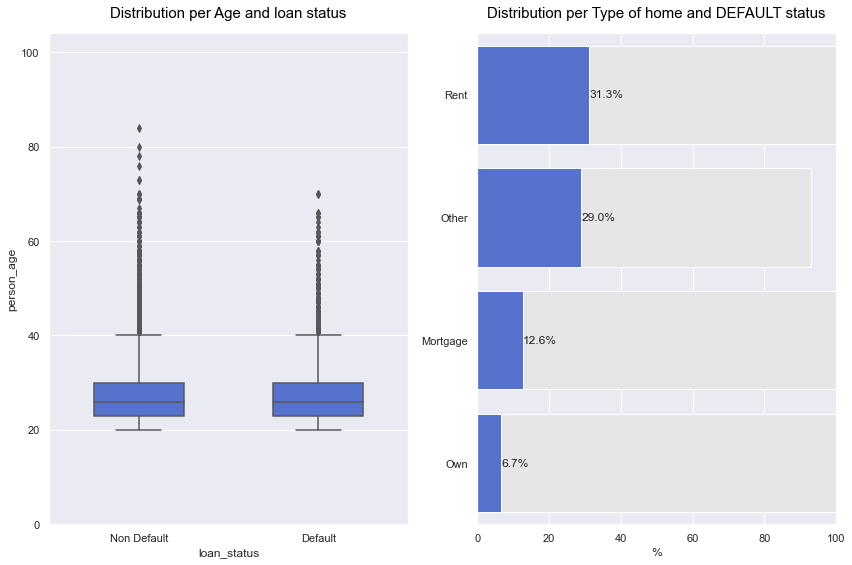



-----------------------------------------------------------------------------------------------------------




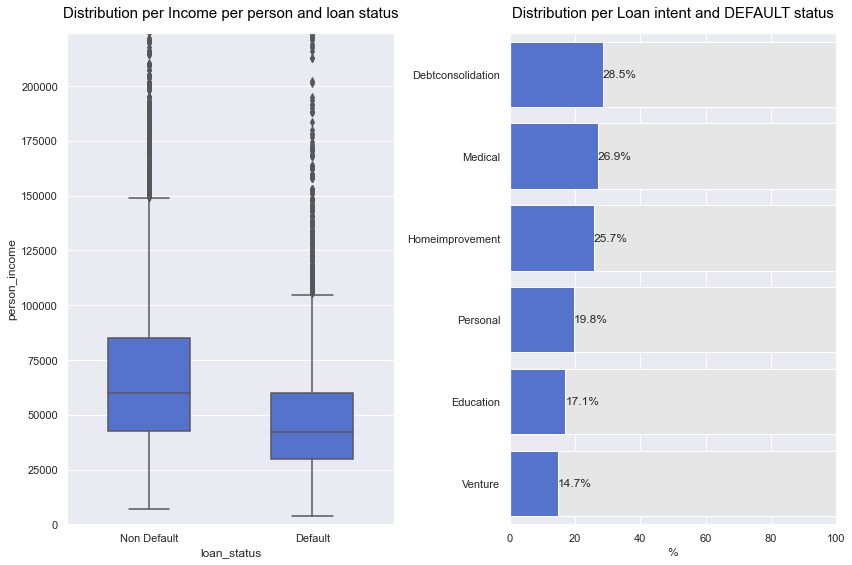



-----------------------------------------------------------------------------------------------------------




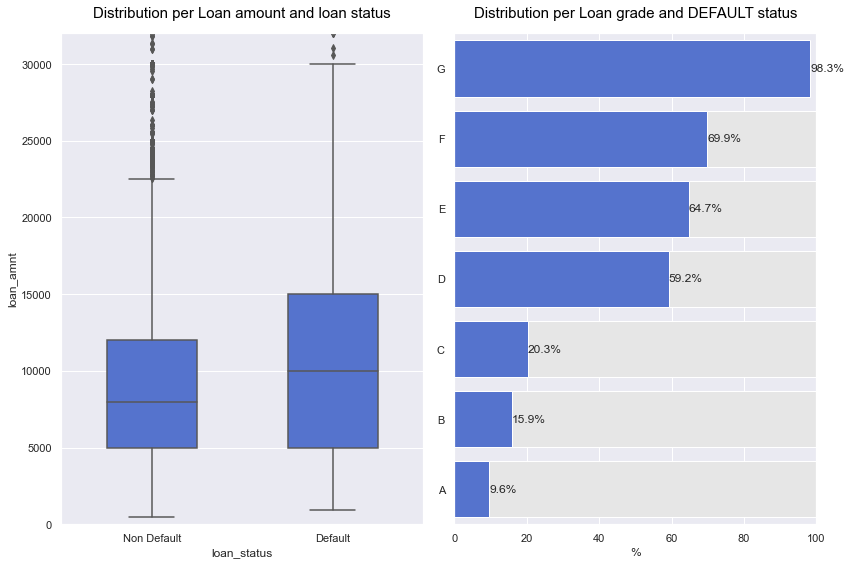



-----------------------------------------------------------------------------------------------------------




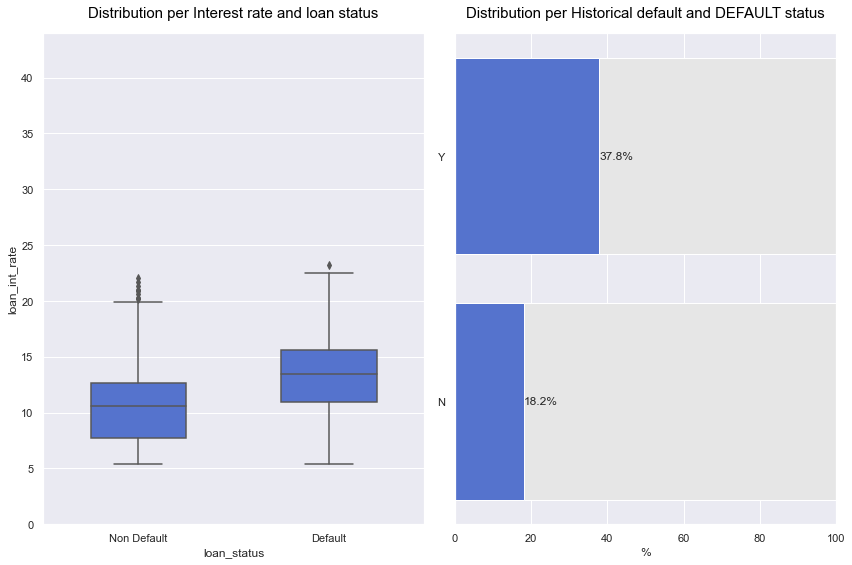



-----------------------------------------------------------------------------------------------------------




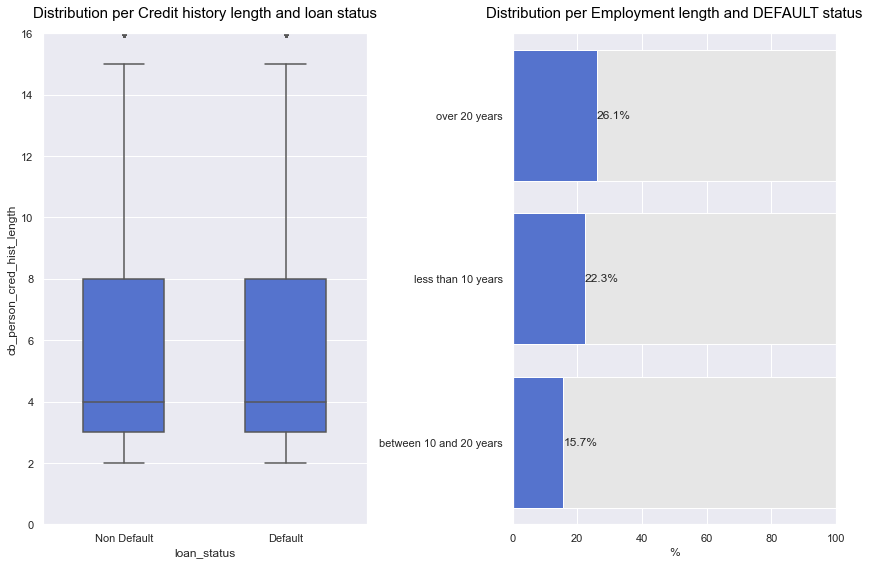



-----------------------------------------------------------------------------------------------------------




In [17]:
df_final['loan_status'] = df_final['loan_status'].map({0: 'Non Default', 1: 'Default'})

numerical_columns = {'Age': 'person_age', 'Income per person': 'person_income',  
                     'Loan amount': 'loan_amnt', 'Interest rate': 'loan_int_rate',
                     'Credit history length': 'cb_person_cred_hist_length'}

categorical_columns = {'Type of home': 'person_home_ownership', 'Loan intent': 'loan_intent', 'Loan grade': 'loan_grade',
                       'Historical default': 'cb_person_default_on_file', 'Employment length': 'emp_length_cat'}

for num, cat in zip(numerical_columns.items(), categorical_columns.items()):
    
    class_distribution(num[1], cat[1], 'Distribution per ' + num[0] + ' and loan status', 
                        'Distribution per ' + cat[0] + ' and DEFAULT status')
    
    print('\n')
    print('-----------------------------------------------------------------------------------------------------------')
    print('\n')
    
df_final['loan_status'] = df_final['loan_status'].map({'Non Default': 0, 'Default': 1})

Conclusions from the plots:

* There is no **clear difference** in the loan status in terms of **client age**;
* Clients with **rent houses** tend to present **default** loans;
* The **bigger** the **person income**, the **less** probable is the **default**;
* Regarding the **loan intention**, debt consolidation, medical and home improvement are the reasons with **biggest** percentage of **default**;
* **Biggest loan amount** are related to **default** clients;
* Almost all the clients with **G grade** have **default loan**. The percentage of loan decreases as the grade get higher;
* **Default** clients are paying **higher loan interest rates**;
* **Only 37.8 %** of the clients with history of default have currently **negative** status;
* It seems to have **no difference** in the loan status considering the **credit history length** of the clients;
* Clients with **higher employment's period of time** are the ones with **higher default rate**.

* Is there a correlation between the person income and the amount of loan taken?

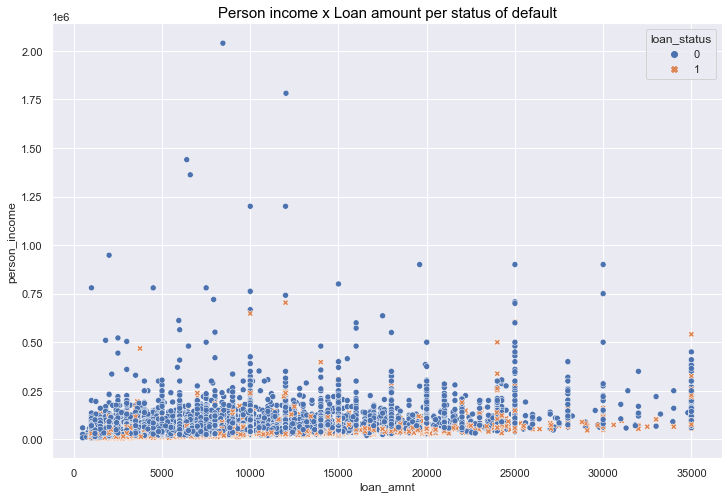

In [18]:
plt.figure(figsize = (12,8))

sns.set(style = 'darkgrid')
    
ax = sns.scatterplot(data = df_final, x = 'loan_amnt', y = 'person_income', hue = 'loan_status', style = 'loan_status')

ax.set_title('Person income x Loan amount per status of default', fontsize = 15, color = 'black')

plt.show()

We can see a **slight positive correlation** between those features. The correlation tends to be higher for Default values only.

Let's check this hipothesis:

In [19]:
df_final['loan_status'] = df_final['loan_status'].map({0: 'Non Default', 1: 'Default'})

corr_features = df_final[['person_income', 'loan_amnt', 'loan_status']]
print(f'Correlation between Person income and Loan amount for both type of loan status:')
print('\n')
print(round(corr_features.corr(), 2))
print('\n')
corr_features = corr_features[corr_features['loan_status'] == 'Default']
print(f'Correlation between Person income and Loan amount for Default loan status:')
print('\n')
print(round(corr_features.corr(),2))

df_final['loan_status'] = df_final['loan_status'].map({'Non Default': 0, 'Default': 1})

Correlation between Person income and Loan amount for both type of loan status:


               person_income  loan_amnt
person_income           1.00       0.32
loan_amnt               0.32       1.00


Correlation between Person income and Loan amount for Default loan status:


               person_income  loan_amnt
person_income           1.00       0.43
loan_amnt               0.43       1.00


## 2.5 Feature Encoding

In order to estimate the **correlation** between the features of the dataframe as well as to prepare them to feed our predictive model it's necessary first to **transform** the data:

In [20]:
# Creating a copy of the dataframe in case we need to get back to this point:

df_loan = df_final.copy()

# Converting the categorical column 'cb_person_default_on_file' into '0' and '1' values:

convert_historical_default = {'N': 0, 'Y': 1}

df_loan['cb_person_default_on_file'] = df_loan['cb_person_default_on_file'].map(convert_historical_default)

# Transforming the other categorical features:

df_loan = pd.get_dummies(df_loan, columns = ['person_home_ownership', 'loan_intent', 'loan_grade'])
df_loan.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,emp_length_cat,person_home_ownership_Mortgage,person_home_ownership_Other,person_home_ownership_Own,person_home_ownership_Rent,loan_intent_Debtconsolidation,loan_intent_Education,loan_intent_Homeimprovement,loan_intent_Medical,loan_intent_Personal,loan_intent_Venture,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,22.0,50000.0,0.0,12800.0,5.79,0,0.26,0,2,less than 10 years,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,26.0,84996.0,0.0,9000.0,11.26,0,0.11,0,2,less than 10 years,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
2,24.0,55782.0,3.0,17000.0,7.51,0,0.30,0,2,less than 10 years,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
3,25.0,125000.0,9.0,25000.0,10.59,0,0.20,0,2,less than 10 years,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,23.0,44340.0,0.0,3000.0,12.98,0,0.07,1,3,less than 10 years,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0


## 2.6 Feature Correlation

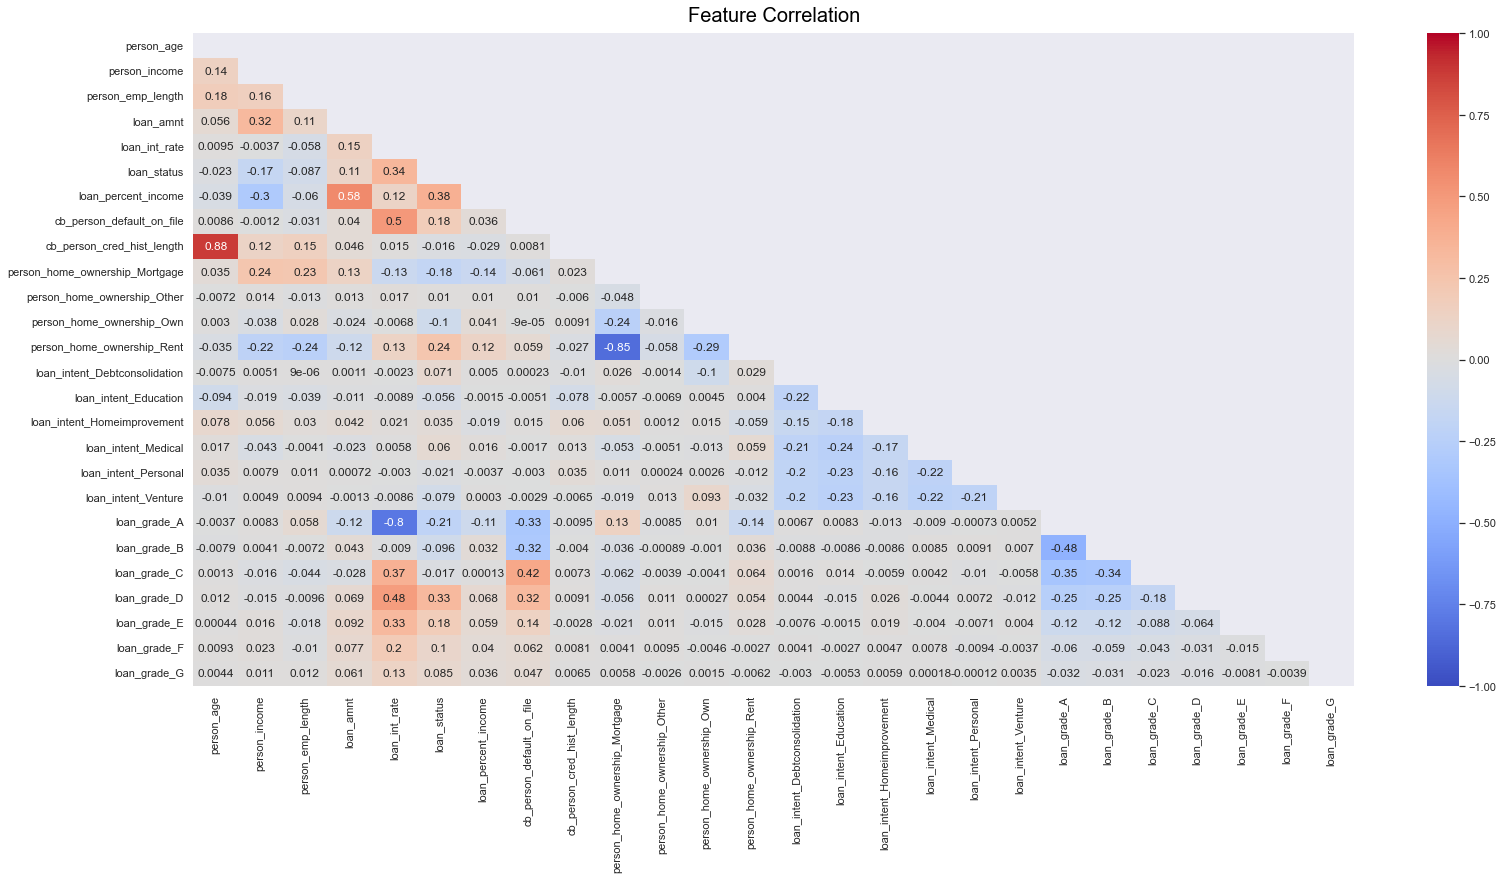

In [21]:
# Creating a plot with the feature correlation:

plt.figure(figsize=(26, 12))
mask = np.triu(np.ones_like(df_loan.corr(), dtype=bool))
ax = sns.heatmap(df_loan.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', mask = mask)
ax.set_title('Feature Correlation', fontdict={'fontsize':20}, pad=12, color = 'black')
plt.show()

The higher **positive correlations**, considering the `loan_status`, are those for `loan_grade_D`, `person_home_ownership_Rent`, `loan_percent_income` and `loan_int_rate` features. In terms of **negative correlations**, the highlights are `loan_grade_A`, `person_home_ownership_Mortgage` and `person_income` features.

There is a **high positive correlation** between `cb_person_cred_hist_length` and `person_age` which can be harmful to the predictive model. The same situation is happening with `loan_percent_income`, `loan_amnt` and `person_income` features since the first is theoretically derived from the others.

## 2.7 Normalizing and balancing data

As we previously identified, our target feature `loan_status` is **inbalanced**, in other words it contains skewed class proportions that would cause our model result to be biased by the most frequent class. Besides, it's a good practice avoiding **unnormalized** data for similar reason.

Therefore, we'll use two techniques to balance data and then choose the one that best fits our problem: **Oversampling (SMOTE)** and **Undersampling (NearMiss)**. Both balancing and normalization, along with model instantiation, will be done by a pipeline class in order to assemble all the steps and cross-validate them together. This is another good practice to avoid **data leakage**.

## 2.8 Creating predictive models

* Defining our features:

In [38]:
y = df_loan['loan_status']
X = df_loan.drop(columns = ['loan_status', 'emp_length_cat', 'cb_person_cred_hist_length'])

As mentioned before, we decided to **drop `cb_person_cred_hist_length`** because it has a high correlation with other feature in our dataset.

We decided to **keep `loan_percent_income`** because, as said in the beginning of this project, it's not conclusive it is the same as other features:

* Holding part of the data to further validation:

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 53)

* Estabilishing the chosen models:

In [40]:
models = {'Logistic Regression': LogisticRegression(random_state = 53, max_iter = 900),
           'KNN': KNeighborsClassifier(),
           'Decision Tree Classifier': DecisionTreeClassifier(random_state = 53),
           'Random Forest Classifier': RandomForestClassifier(random_state = 53,  n_estimators = 100),
           'Gradient Boosting Classifier': GradientBoostingClassifier(n_estimators = 100, random_state = 53),
           'XGBoost Classifier': xgb.XGBClassifier(learning_rate=0.15, n_estimators=700, seed = 53)}

* Creating a function to evaluate the accuracy of the models:

In [41]:
def classification_report_accuracy_score(y_true, y_pred):
    
    # Evaluating the accuracy score of model:
    
    raw.extend(y_true)
    predicted.extend(y_pred)
    return accuracy_score(y_true, y_pred)

* Creating a function to evaluate the main metrics for classification models:

In [42]:
def classification_metrics(report, result):
    
    # Printing classification report and test accuracy interval:
    
    for report, i in zip(report.items(), result.values()):
        
        print(f'{report[0]}:\n')
        print(report[1])
        
        print('\n')
        
        avg = i['test_score'].mean()
        std = i['test_score'].std()
        print("Test accuracy interval: [%.2f, %.2f]" % ((avg - 2 * std)*100, (avg + 2 * std) * 100))
        
        print('\n')
        print('-------------------------------------------------------------------------')
        print('\n')

* Creating a function to plot both the ROC and Precision-Recall curve and evaluate the AUC

In [43]:
def plot_AUC(models, oversampling = False, undersampling = False):
        
    X_train_auc = X_train.copy()
    y_train_auc = y_train.copy()
    X_val_auc = X_val.copy()
    y_val_auc = y_val.copy()
    
    plt.figure(figsize = (16,8))
    
    ax0 = plt.subplot(121)
    ax0.plot([1, 0], [0.5, 0.5], 'r--')
    
    # Iterating over the models in the dictionary:

    for name, model in models.items():
        
        if undersampling:

            undersampling_method  = NearMiss(version = 2)
            scaler = RobustScaler()
            model_type = model

            pipeline = Pipeline([('Balancing', undersampling_method), ('Normalization', scaler), ('Model', model_type)])
        
        elif oversampling:
        
            oversampling_method  = SMOTE(random_state = 53, k_neighbors = 5)
            scaler = RobustScaler()
            model_type = model

            pipeline = Pipeline([('Balancing', oversampling_method), ('Normalization', scaler), ('Model', model_type)])
        

        model_trained = pipeline.fit(X_train_auc, y_train_auc)
        pred_proba = model_trained.predict_proba(X_val_auc)
        prob_model = pred_proba[:, 1]
        precision, recall, thresh = metrics.precision_recall_curve(y_val_auc, prob_model)
        auc_score_precision_recall = auc(recall, precision)
        ax0.plot(recall, precision, label=f'{name}, AUC = {str(round(auc_score_precision_recall,3))}')
        
    ax0.set_ylabel('Precision', fontsize = 12, color = 'black')
    ax0.set_xlabel('Recall', fontsize = 12, color = 'black')
    ax0.set_title('Precision-Recall curve', color = 'black', fontsize = 15, y = 1.02)
    ax0.legend(loc='lower left')
        
        
    ax1 = plt.subplot(122)
    ax1.plot([0, 1], [0, 1],'r--')
    
    # Iterating over the models in the dictionary:

    for name, model in models.items():
        
        if undersampling:

            undersampling_method  = NearMiss(version = 2)
            scaler = RobustScaler()
            model_type = model

            pipeline = Pipeline([('Balancing', undersampling_method), ('Normalization', scaler), ('Model', model_type)])
        
        elif oversampling:
        
            oversampling_method  = SMOTE(random_state = 53, k_neighbors = 5)
            scaler = RobustScaler()
            model_type = model

            pipeline = Pipeline([('Balancing', oversampling_method), ('Normalization', scaler), ('Model', model_type)])
        

        model_trained = pipeline.fit(X_train_auc, y_train_auc)
        pred_proba = model_trained.predict_proba(X_val_auc)
        prob_model = pred_proba[:, 1]
        fpr, tpr, thresh = metrics.roc_curve(y_val_auc, prob_model)
        auc_score_roc = roc_auc_score(y_val_auc, prob_model)
        ax1.plot(fpr, tpr, label=f'{name}, AUC = {str(round(auc_score_roc,3))}')
        
    ax1.set_ylabel('True Positive Rate', fontsize = 12, color = 'black')
    ax1.set_xlabel('False Positive Rate', fontsize = 12, color = 'black')
    ax1.set_title('ROC curve', color = 'black', fontsize = 15, y = 1.02)
    ax1.legend(loc='lower right')

* Creating a baseline model:

In [28]:
X_dummy = X_train.copy()
y_dummy = y_train.copy()

raw = []
predicted = []

result_dummy = {}
report_dummy = {}

model_dummy = DummyClassifier(strategy = 'stratified', random_state = 53)

result_dummy['Dummy'] = cross_validate(model_dummy, X_dummy, y_dummy, cv = 10, return_train_score = False,
                  scoring = make_scorer(classification_report_accuracy_score))
report_dummy['Dummy'] = (classification_report(raw, predicted))

* Creating models with undersampling technique:

In [29]:
X_undersampling = X_train.copy()
y_undersampling = y_train.copy()

raw = []
predicted = []

result_undersampling = {}
report_undersampling = {}

for name, model in models.items():
    
    undersampling = NearMiss(version = 2)
    scaler = RobustScaler()
    model_type = model
    
    pipeline = Pipeline([('Balancing', undersampling), ('Normalization', scaler), ('Model', model_type)])
    
    cv = StratifiedKFold(n_splits = 10, shuffle=True)
    
    result_undersampling[name] = cross_validate(pipeline, X_undersampling, y_undersampling, cv = cv, 
                                    return_train_score = False, scoring = make_scorer(classification_report_accuracy_score))
    
    report_undersampling[name] = (classification_report(raw, predicted))
    
    raw = []
    predicted = []

* Creating models with oversampling technique:

In [44]:
X_oversampling = X_train.copy()
y_oversampling = y_train.copy()

raw = []
predicted = []

result_oversampling = {}
report_oversampling = {}

for name, model in models.items():
    
    oversampling = SMOTE(random_state = 53, k_neighbors = 5)
    scaler = RobustScaler()
    model_type = model
    
    pipeline = Pipeline([('Balancing', oversampling), ('Normalization', scaler), ('Model', model_type)])
    
    cv = StratifiedKFold(n_splits = 10, shuffle=True)
    
    result_oversampling[name] = cross_validate(pipeline, X_oversampling, y_oversampling, cv = cv, 
                                   return_train_score = False, scoring = make_scorer(classification_report_accuracy_score))
    
    report_oversampling[name] = (classification_report(raw, predicted))
    
    raw = []
    predicted = []

## 2.9 Evaluating the models

* Dummy Classifier:

In [31]:
classification_metrics(report_dummy, result_dummy)

Dummy:

              precision    recall  f1-score   support

           0       0.79      0.79      0.79     17848
           1       0.23      0.22      0.22      4948

    accuracy                           0.67     22796
   macro avg       0.51      0.51      0.51     22796
weighted avg       0.66      0.67      0.67     22796



Test accuracy interval: [65.64, 68.02]


-------------------------------------------------------------------------




As we expected, the **baseline model Dummy Classifier** just reproduces the distribution of classes in our target value since it wasn't balanced.

* Undersampling:

Logistic Regression:

              precision    recall  f1-score   support

           0       0.95      0.49      0.65     17848
           1       0.33      0.90      0.48      4948

    accuracy                           0.58     22796
   macro avg       0.64      0.70      0.56     22796
weighted avg       0.81      0.58      0.61     22796



Test accuracy interval: [55.51, 60.40]


-------------------------------------------------------------------------


KNN:

              precision    recall  f1-score   support

           0       0.95      0.56      0.71     17848
           1       0.36      0.88      0.51      4948

    accuracy                           0.63     22796
   macro avg       0.65      0.72      0.61     22796
weighted avg       0.82      0.63      0.66     22796



Test accuracy interval: [60.76, 65.80]


-------------------------------------------------------------------------


Decision Tree Classifier:

              precision    recall  f1-score   support

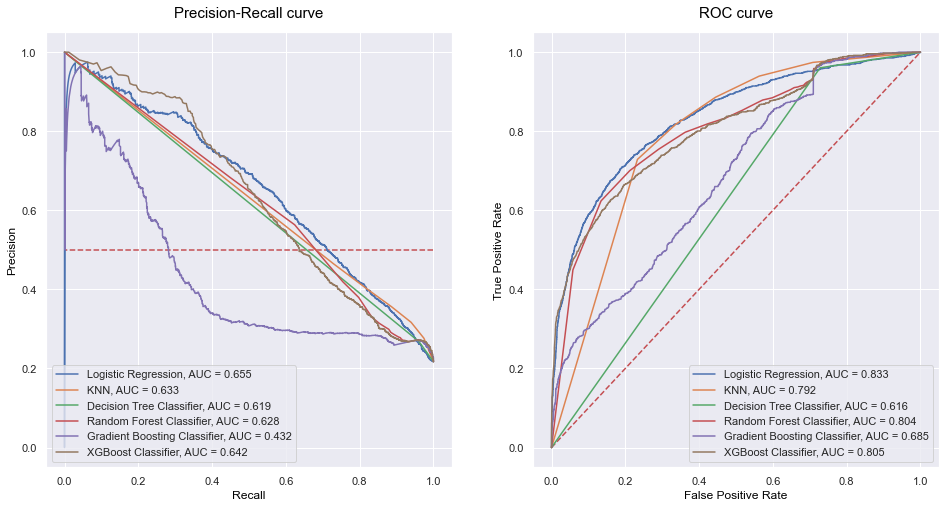

In [32]:
classification_metrics(report_undersampling, result_undersampling)
plot_AUC(models, undersampling = True)

* Oversampling:

Logistic Regression:

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     17848
           1       0.75      0.59      0.66      4948

    accuracy                           0.87     22796
   macro avg       0.82      0.77      0.79     22796
weighted avg       0.86      0.87      0.86     22796



Test accuracy interval: [85.92, 87.77]


-------------------------------------------------------------------------


KNN:

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     17848
           1       0.80      0.65      0.72      4948

    accuracy                           0.89     22796
   macro avg       0.85      0.80      0.83     22796
weighted avg       0.89      0.89      0.89     22796



Test accuracy interval: [88.10, 89.79]


-------------------------------------------------------------------------


Decision Tree Classifier:

              precision    recall  f1-score   support

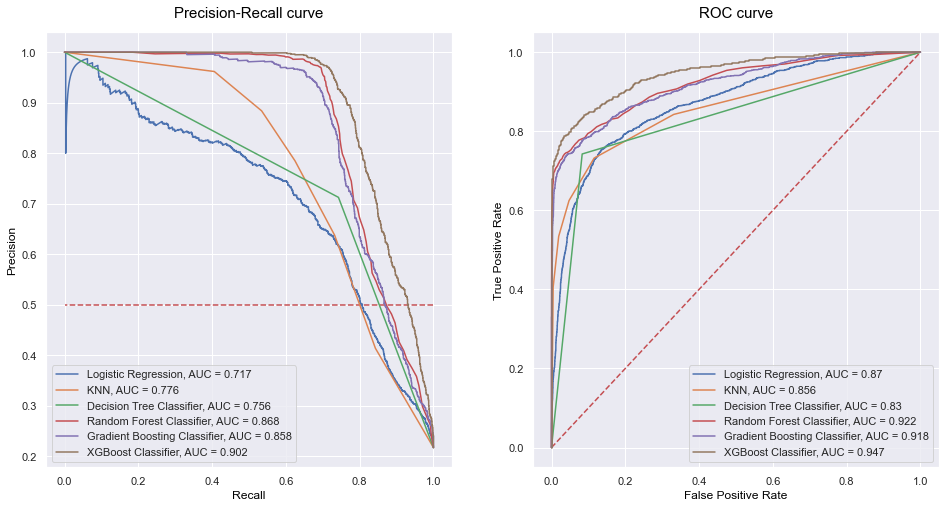

In [33]:
classification_metrics(report_oversampling, result_oversampling)
plot_AUC(models, oversampling = True)

The worst results in the validation data for **undersampling** indicate that this technique is **not suitable** for our dataset. For this reason, we will focus on the **oversampling** models only:

For our main objective to **classify the risk of default** among the clients, it is **more important** that the number of **False Negatives** to be **as low as possible** in order to avoid future loss of credit. On the other hand, although also important, the number of False Positives would only prevent the company to concede loan to certain clients.

We are then more focused on the **Recall** metric rather than the Precision. From the models evaluated, Decision Tree , Random Forest, Gradient Boosting and XGBoost are the ones with the higher score.

Two more diagnostic tools to help us decide for the best model are the **ROC** and **Precision-Recall** plot, being the latter preferred since it is appropriate for imbalanced datasets. The **AUC** is the area under the curves and can be used as the metric.

The Decision Tree Classifier presents the best recall metric, however it doesn't fit well for the validation dataset according to the plots. Also, there's no great difference between Random Forest and Gradient Boosting, being the first faster. This way, we will choose **Random Forest Classifier** and **XGBoost Classifier** for now and follow through with tuning.

## 2.10 Model Tuning

In [34]:
models = {'Random Forest Classifier': RandomForestClassifier(),
          'XGBoost Classifier': xgb.XGBClassifier()}

# Random Forest Classifier hiperparmaters:

hiperparametros_rf = {'Model__n_estimators': [100, 200, 300, 400, 500, 600],
                      'Model__max_depth': [None, 3, 4, 5],
                      'Model__min_samples_split': [2, 3]}


# XGBoost Classifier hiperparmaters:

hiperparametros_xgb = {'Model__n_estimators': [500, 600, 700, 800, 900],
                       'Model__learning_rate': [0.01, 0.02, 0.15],
                       'Model__max_depth': [3, 4, 5, 6],
                       'Model__min_child_weight': [1, 2, 3]}


otimiz = {}

for name, model in models.items():
    
    if name == 'Random Forest Classifier':
        
        params = hiperparametros_rf
        
    elif name == 'XGBoost Classifier':
        
        params = hiperparametros_xgb

        
    oversampling = SMOTE(random_state = 53, k_neighbors = 5)
    scaler = RobustScaler()

    pipeline = Pipeline([('Balancing', oversampling), ('Normalization', scaler), ('Model', model)])
    
    cv = StratifiedKFold(n_splits = 5, shuffle=True)
    
    otimiz[name] = GridSearchCV(pipeline, params, cv = cv)
    otimiz[name].fit(X_train, y_train)

Let's now check the results for our **best models**:

In [147]:
best_models = {'Random Forest Classifier': RandomForestClassifier(max_depth = otimiz['Random Forest Classifier'].best_params_['Model__max_depth'], 
                                                                  min_samples_split = otimiz['Random Forest Classifier'].best_params_['Model__min_samples_split'], 
                                                                  n_estimators = otimiz['Random Forest Classifier'].best_params_['Model__n_estimators']),
               'XGBoost Classifier': xgb.XGBClassifier(learning_rate = otimiz['XGBoost Classifier'].best_params_['Model__learning_rate'], 
                                                                          max_depth = otimiz['XGBoost Classifier'].best_params_['Model__max_depth'], 
                                                                          min_child_weight = otimiz['XGBoost Classifier'].best_params_['Model__min_child_weight'], 
                                                                          n_estimators = otimiz['XGBoost Classifier'].best_params_['Model__n_estimators'])}

In [144]:
X_best_models = X_train.copy()
y_best_models = y_train.copy()

raw = []
predicted = []

result_best_models = {}
report_best_models = {}

for name, model in best_models.items():
    
    oversampling = SMOTE(random_state = 53, k_neighbors = 5)
    scaler = RobustScaler()
    model_type = model
    
    pipeline = Pipeline([('Balancing', oversampling), ('Normalization', scaler), ('Model', model_type)])
    
    cv = StratifiedKFold(n_splits = 10, shuffle=True)
    
    result_best_models[name] = cross_validate(pipeline, X_best_models, y_best_models, cv = cv, 
                                   return_train_score = False, scoring = make_scorer(classification_report_accuracy_score))
    
    report_best_models[name] = (classification_report(raw, predicted))
    
    raw = []
    predicted = []

Random Forest Classifier:

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     17848
           1       0.95      0.73      0.82      4948

    accuracy                           0.93     22796
   macro avg       0.94      0.86      0.89     22796
weighted avg       0.93      0.93      0.93     22796



Test accuracy interval: [92.21, 94.36]


-------------------------------------------------------------------------


XGBoost Classifier:

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     17848
           1       0.93      0.76      0.83      4948

    accuracy                           0.93     22796
   macro avg       0.93      0.87      0.90     22796
weighted avg       0.93      0.93      0.93     22796



Test accuracy interval: [92.85, 94.10]


-------------------------------------------------------------------------




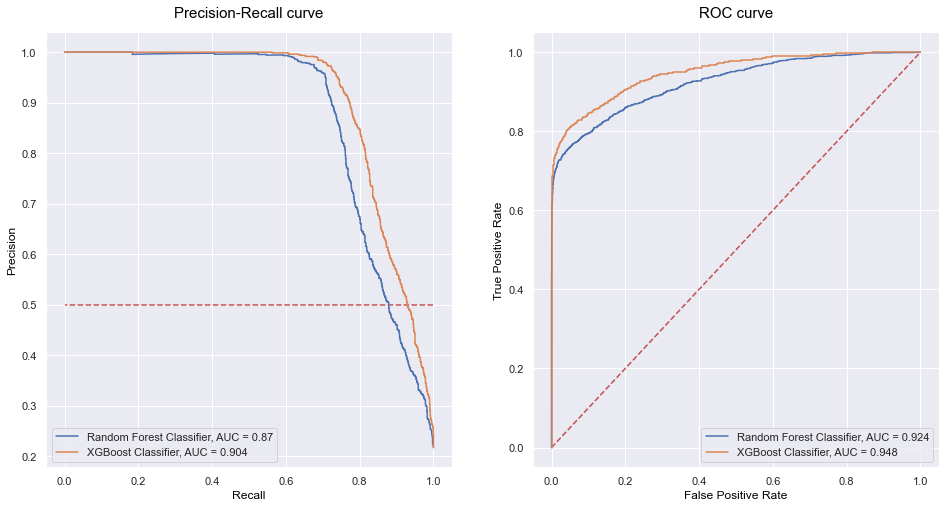

In [145]:
classification_metrics(report_best_models, result_best_models)
plot_AUC(best_models, oversampling = True)

We didn't verify an improvement by tuning the hiperparameters. Comparing both models, we will choose **XGBoost Classifier** because it performed better on both the training set (recall metric) and the validation set (AUC metric).

## 2.11 Feature Importance

In [ ]:
X_best_model = X_train.copy()
y_best_model = y_train.copy()

best_model =  xgb.XGBClassifier(learning_rate = otimiz['XGBoost Classifier'].best_params_['Model__learning_rate'], 
                                                                          max_depth = otimiz['XGBoost Classifier'].best_params_['Model__max_depth'], 
                                                                          min_child_weight = otimiz['XGBoost Classifier'].best_params_['Model__min_child_weight'], 
                                                                          n_estimators = otimiz['XGBoost Classifier'].best_params_['Model__n_estimators'])

oversampling_method  = SMOTE(random_state = 53, k_neighbors = 5)
scaler = RobustScaler()

pipeline = Pipeline([('Balancing', oversampling_method), ('Normalization', scaler), ('Model', best_model)])

best_model_trained = pipeline.fit(X_best_model, y_best_model)

In [32]:
feature_importance = pd.DataFrame({'feature': X_best_model.columns, 
                                   'importance': best_model_trained[2].feature_importances_})

new_features_df = feature_importance[feature_importance['importance']>0
                                    ].sort_values(by=['importance'],ascending=False)

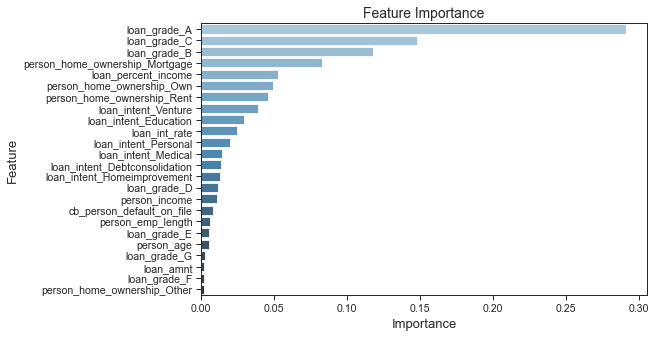

In [36]:
sns.set(context='paper', style='ticks',  font='sans-serif', 
        font_scale=1.2, color_codes=True, rc=None)
figure, ax = plt.subplots(figsize=(8, 5))
ax=sns.barplot(data = new_features_df,
              y='feature',
              x='importance',
              palette='Blues_d') # rocket, Blues_d
ax.set_title('Feature Importance', fontsize=14)
ax.set_xlabel('Importance', fontsize=13)
ax.set_ylabel('Feature', fontsize=13)
plt.show()

## 2.12 Exporting the model

We will use `Joblib` library to export the chosen model externally.

In [28]:
filename = 'default_model.sav'
joblib.dump(best_model_trained, filename)

['default_model.sav']

## 2.13 Final Considerations

In this project, we were able to explore and create insights from the dataset of the digital bank **Alura Cash** . The company's main concern is to reduce the default among the clients.

For this purpose, we created a machine learning model to predict the probability of a specific loan to become a default. Our chosen model was **XGBoost Classifier** with **76% recall** and **90,4% AUC** performance metrics.

In order to improve the model performance, the following strategies may be further studied:

* The missing values previously removed could be treated and used in the final dataset;
* More feature combination and also feature engineering for the model training using the information from Feature Importance could be studied;
* Other oversampling techniques could be used;
* More models or even a blend of models could be tested.

# 3. Alura Challenge - week 03

💻**Objetives**
* Deploy the trained model to a web app
* Create a dashboard with client statistics

## 3.1 Importing Libraries

In [4]:
from IPython.display import IFrame

## 3.2 Deploying the model to a web app

For this project, we will use **Streamlit** framework to deploy our trained model. Along with the final prediction, the user will have access to interesting plots comparing the client situation to those from Alura Cash database.

The app is shown below and can also be accessed by the link in `README` file.

In [7]:
url = "https://fabianomanetti-alurachallenge-2-app-2fn8rn.streamlitapp.com/?embedded=true"
IFrame(url, width=1000, height=1200)

## 3.3 Creating a Dashboard

It will be used `Power BI`software to create a dashboard showing the main client statistics.

In [5]:
url = "https://app.powerbi.com/view?r=eyJrIjoiYzZhZmM3ZTItNzIwZC00NjNlLTk0MTYtZTNiOTFmMDJiMGY4IiwidCI6IjA4ZDY3NWMwLWJkYTQtNDkzZC04MmI3LWU2YTM3MmQ5NTQ3ZCJ9"
IFrame(url, width=1000, height=1200)